<font color='red'> 찾아볼 함수 </font>
- np.where
- np.ndarray.astype

## Programming Exercise 2: Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

### 1 Logistic Regression

In [6]:
datafile = 'data/ex2data1.txt'
##############################################################################
# np.loadtxt를 사용해서 datafile을 불러오기.                                 
# 조건 :구분자는 "," 이고 데이터 범위는 column 기준 0, 1, 2번째, unpack : True   
##############################################################################

### 코드 시작 ### 
cols = np.loadtxt('./data/ex2data1.txt', delimiter=',', usecols = (0,1,2), unpack=True)
### 코드 끝 ###
assert cols.shape == (3, 100), "불러온 데이터의 shape가 맞지 않음." 

##############################################################################
# X, y를 적절한 형태로 바꾼다. m x n(m: 데이터 개수, n: feature 개수)
# transpose 나 reshape 사용하면 됨. 
##############################################################################

### 코드 시작 ### 
X = np.transpose(cols[:2])
y = np.transpose(cols[2:3])
m = 100 # 데이터 개수 m으로 저장

### 코드 끝 ###
assert X.shape == (100, 2) and y.shape == (100, 1), "X 혹은 y의 shape가 맞지 않음."


##############################################################################
# X vector에 값이 1로 이루어진 1개 열을 추가해서 matrix로 만들어준다.              
# 강의에서 bias(theta0) 값 X에 넣어주는 연산임.                                
# np.insert 사용.                                                        
##############################################################################

### 코드 시작 ###
X = np.insert(X, 2, 1, axis=1)
## 이전 코드 보면 1번째 열에 1을 넣어줬음!! 위 코드는 3번째 열(2)에 1을 넣어주는 코드. 
## --> 그래서 아래 그래프 그린거 보면 y좌표가 전부다 1인 걸로 보임. 

### 코드 끝 ###
assert X.shape == (100, 3), "X의 shape가 맞지 않음"

#### 1.1 Visualizing the data

In [7]:
##############################################################################
# X를 positive/negative 데이터로 각각 나누어주자. 
# positive는 y==1일 때의 index에 해당하는 X의 값
# negative는 y==0일 때의 index에 해당하는 X의 값이다.                                                            
# np.where를 사용하면 된다. 
##############################################################################

### 코드 시작 ###
pos = X[np.where(y==1)[0]]
neg = X[np.where(y==0)[0]]
### 코드 끝 ###
assert pos.shape == (60, 3) and neg.shape == (40, 3)

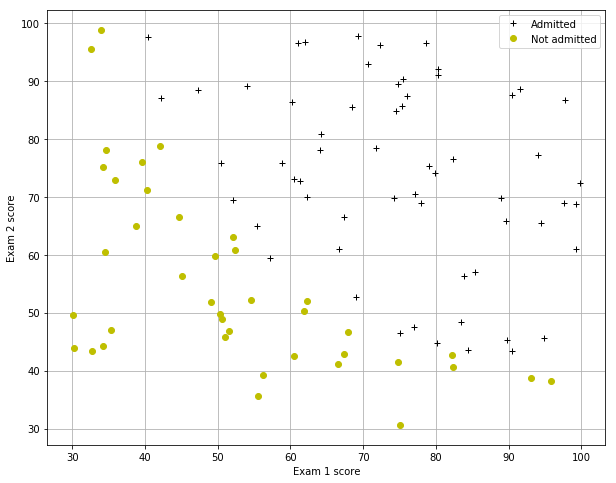

In [8]:
# pos, neg 데이터를 scatter 그래프로 나타내보자. 
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

#### 1.2 Implementation

In [9]:
##############################################################################
# sigmoid 함수를 만들어보자. 
# 수식을 보고 작성하면 된다. 
##############################################################################


def sigmoid(x):
    """
    X : X 데이터, shape=(m, n), (array)
    """
    ### 코드 시작 ###    
    return 1 / (1 + np.exp(-x))
    ### 코드 끝 ###
print("x=1일 때 sigmoid 계산 값 차이 : ", rel_error(sigmoid(1), 0.73105857))

x=1일 때 sigmoid 계산 값 차이 :  5.9024031973e-09


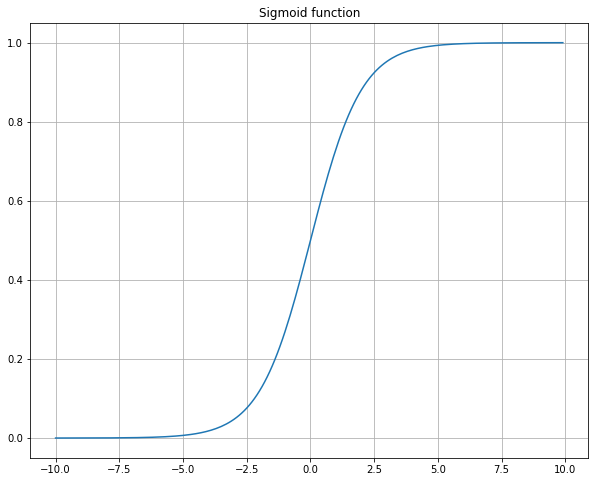

In [13]:
# sigmoid 그래프로 나타내기 
## 중복된 코드 있었어서 안 돌아갔음. 코드 수정함!!
def plotsigmoid():
    x = np.arange(-10,10,.1)
    plt.plot(x, sigmoid(x))
    plt.title('Sigmoid function')
    plt.grid()
    plt.show()

plotsigmoid()

In [14]:
def h(theta,X): 
    """
    theta : theta 값, shape=(n, 1), (array)
    X : X 데이터, shape=(m, n), (array)
    """
    ##############################################################################
    # logistic function에서의 h식을 만들어보자. 
    # 위에서 선언한 sigmoid 함수를 활용하자 
    ##############################################################################
    
    ### 코드 시작 ###
    return sigmoid(np.dot(X,theta))
    ### 코드 끝 ###

def computeCost(theta, X, y): 
    """
    theta : theta 값, shape=(n, 1), (array)
    X : X 데이터, shape=(m, n), (array)
    y : y 데이터, shape=(m, 1), (array)
    """
    ##############################################################################
    # Cost 함수를 구해보자. 
    # 강의에서 배운 수식을 2개로 쪼개서 앞 쪽, 뒤 쪽을 numpy로 구현한 뒤에 합치면 된다. 
    # np.dot, np.sum, transpose, 위에서 정의한 h식을 섞어서 사용하면 된다. 
    ##############################################################################
    
    ### 코드 시작 ###
    A = np.dot(y.T, np.log(h(theta, X)))
    B = np.dot((1 - y).T, np.log(1 - h(theta, X)))
    return (-1) / m * np.sum(A + B)
    ### 코드 끝 ### 

In [15]:
# 임의로 정한 theta 값
initial_theta = np.zeros((X.shape[1],1))
# cost 계산 
computeCost(initial_theta,X,y)

print("Cost 값과 정답과의 차이 : ", rel_error(computeCost(initial_theta, X, y), 0.6931471))

Cost 값과 정답과의 차이 :  5.81117200647e-08


## Optimization 

gradient descent가 그렇듯 아래 식을 풀어서 optimization을 할 예정이다. <br>
$\theta_j := \theta_j - \alpha {\frac \partial {\partial \theta_j}} J(\theta_0, \theta_1)$ 식을 똑같이 미분해서 구하면 되는데 음... 조금 어려울 수도 있다. 

Cost function을 보면 아래와 같고, <br>
$J(\theta)=-\frac{1}{m}\sum_{i=1}^m \left[y^i\theta x^i-\theta x^i-\log(1+e^{-\theta x^i})\right]=-\frac{1}{m}\sum_{i=1}^m \left[y^i\theta x^i-\log(1+e^{\theta x^i})\right] ~~(1)$ <br>

위 식을 적당히 미분하면(*일단 패스하자*) 아래 결과를 얻을 수 있다. <br>
$\frac{\partial}{\partial \theta_j}y^i\theta x^i=y^ix^i_j ~~(2) $ <br>
$\frac{\partial}{\partial \theta_j}\log(1+e^{\theta x^i})=\frac{x^i_je^{\theta x^i}}{1+e^{\theta x^i}}=x^i_jh_\theta(x^i)~~(3)$ <br>

전개 과정은 생략하고 1번 식인 $J(\theta)$ 내부 식을 $\theta$에 대한 derivative를 구하면 (2), (3) 번 식을 유도할 수 있다.

그럼, $\frac{\partial}{\partial \theta_j}J(\theta) = -\frac{1}{m} \sum_{i=1}^m \big [ y^ix^i_j + x^i_jh_\theta(x^i) \big ]$

In [16]:
# iteration 10만번 예정이다. 
iterations = 100000
# learning_rate는 0.001
alpha = 0.001

def descendGradient(X, theta):
    """
    theta : theta 값, shape=(n, 1), (array)
    X : X 데이터, shape=(m, n), (array)
    """
    theta_history = []  # theta 변화 과정 저장 
    cost_history = []  # cost 변화 과정 저장 
    ##############################################################################
    # Gradient descent를 하자. 
    # 1) 위에서 혹은 강의에서 배운 수식을 gradient로 구현한다. 
    # 2) iteration 만큼 theta를 update 시켜준다. 
    # 3) 매번 업데이트 시켜줬을 때 cost, theta 값을 위에 cost_history, theta_history에 각각 저장해준다. 
    # 4) iterations 만큼 update 시켜준 뒤에 theta, cost_history, theta_history를 return 한다. 
    # linear regression에서 구현한 식이랑 거의 비슷하다. 
    ##############################################################################
    
    for i in range(iterations):
        theta_tmp = theta
        cost_history.append(computeCost(theta, X, y))
        theta_history.append(theta)
        theta_tmp = theta - (alpha * np.sum(np.dot(X.T, (h(theta, X) - y))))
        theta = theta_tmp
    
    return theta, cost_history, theta_history
    

In [17]:
# gradient descent 실행
theta, theta_history, cost_history = descendGradient(X, initial_theta)
true_theta = np.array([[-4.81180027],
                       [0.04528064],
                       [0.03819149]])
print("theta 값과 정답과의 차이 : ", rel_error(theta, true_theta))

/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


theta 값과 정답과의 차이 :  1.0


In [18]:
## 위 descentGradient 코드에서 다 잘했는데 아래 theta값을 보면 전부다 같은 걸로 보임. 
## 뭔가 중간 연산이 전부다 같은 값으로 되는 것처럼 보이는데 그거만 수정하면 될 듯함!!
## 아 그리고 theta 값과 정답과의 차이가 1.0이면 값이 다르다고 생각하면 됨. (참고) 
theta

array([[ 2.30716427],
       [ 2.30716427],
       [ 2.30716427]])

In [68]:
# 예측 함수 구현해보자. 우리가 구한 theta를 통해서 X를 넣어줬을 때 얼마나 y가 맞게 나오는 지 확인하기 위함이다. 
def predict(theta, X, threshold=0.5):
    """
    theta : theta 값, shape=(n, 1), (array)
    X : X 데이터, shape=(m, n), (array)
    threshold : y 결정하는 기준 값. (float) 
    threshold는 1에 가까이 두면 positive에 penalty를 주는 것이고 0에 가까이두면 negative에 penalty를 주는 것이다. 
    """
    ##############################################################################
    # theta, X를 이용해서 예측을 해보고 값이 threshold 보다 큰 경우를 1 작은 경우를 0으로 return 하자. 
    # astype 이라는 함수를 새롭게 사용하게 될 것이다. 
    ##############################################################################
    pred = h(theta, X) >= threshold

    return (pred.astype('int'))

In [69]:
# prediction 값을 구해보자. 
pred = predict(theta, X) 
correct = np.sum(pred == y) / len(pred)
print('correct 값과 정답과의 차이 : ', rel_error(correct, 0.91))
print('Train accuracy {}%'.format(100 * correct))

correct 값과 정답과의 차이 :  0.205298013245
Train accuracy 60.0%


ValueError: x and y can be no greater than 2-D, but have shapes (100000,) and (100000, 3, 1)

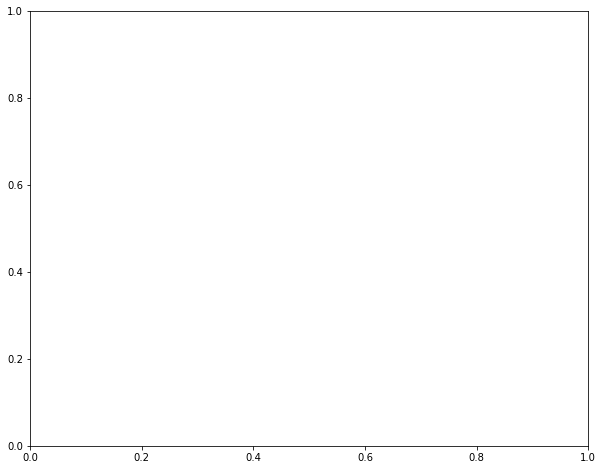

In [19]:
# 학습에 따른 cost 감소 그래프를 보자.
## plot 그릴 때는 x축 값, y축 값이 같이 줘야 함. x에 iteration, y에 cost_history 주면 됨!!
plt.plot(cost_history)
plt.title('cost history')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [72]:
# 구한 theta를 이용해서 잘 구분되는 지 확인해보자. 
# 일단 theta가 정해졌고, x1, x2를 이용해서 식을 구성했을 때 y값이 0.5가 되면 
# 그 위치에서 decision boundary를 형성한다고 생각할 수 있겠다. 
# 그리고 위에 sigmoid 그래프를 잘 보면 y가 0.5일 때는 np.dot(theta, X)가 0일 때이다. 
# 그래프를 그리기 위해서 x1값을 주어지고 x2를 구한다고 생각하면 쉽다. 구하는 식은 h식을 잘 가공하면 된다. 

# theta값 확인
print(theta)

### 코드 시작 ###
x1 = np.linspace(30, 100, 1000) 
theta0 = 
theta1 = 
theta2 = 
x2 = 
### 코드 끝 

SyntaxError: invalid syntax (<ipython-input-72-939a4c37f453>, line 12)

In [ ]:
# 그래프 그려보자. 잘 구분된 거 같은지 확인한다. 
def plotData2():
    plt.scatter(pos[:,1],pos[:,2], c='k', marker='+', label='Admitted')
    plt.scatter(neg[:,1],neg[:,2], c='y', marker='o',label='Not admitted')
    plt.plot(x1, x2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid()
    
plotData2()

아래는 동일한 내용을 scipy로 구현한 예제이다. 

In [ ]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]


In [ ]:
theta, mincost = optimizeTheta(initial_theta,X,y)
#That's pretty cool. Black boxes ftw

In [ ]:
#"Call your costFunction function using the optimal parameters of θ. 
#You should see that the cost is about 0.203."
print(computeCost(theta,X,y))

In [ ]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [ ]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print(h(theta,np.array([1, 45.,85.])))

In [ ]:
# scipy에서 나오는 theta는 rank가 1이라서 2로 바꿔준다. 
theta = theta.reshape([-1, 1])

In [ ]:
pred = predict(theta, X) 
correct = np.sum(pred == y) / len(pred)
print('Train accuracy {}%'.format(100 * correct))

### 2 Regularized Logistic Regression

#### 2.1 Visualizing the data

In [20]:
datafile = 'data/ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [21]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

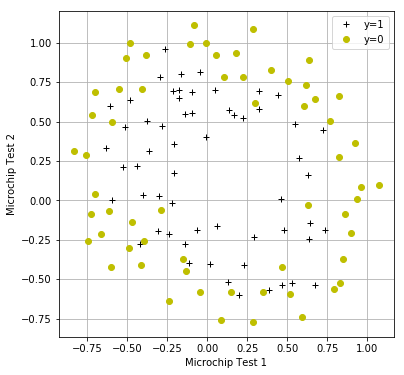

In [22]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

#### 2.2 Feature mapping

In [23]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [24]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

### 아래는 조금 더 많은 feature가 있는 경우에 logistic classification을 적용한 것이다. 
위에서 정의한 cost, gradient로 잘 되는 지 확인해보자.

In [25]:
# 우리가 사용할 X, y의 정보는 아래와 같다.
# X로 mappedX를 사용할 건데 위에서 불러온 (118, 3) 데이터를 특정 함수를 통해서 mapping한 값이라고 보면 된다. 
print("mappedX의 shape : {}".format(mappedX.shape))
print("y의 shape : {}".format(y.shape))

mappedX의 shape : (118, 28)
y의 shape : (118, 1)


#### 2.3 Cost function and gradient

In [29]:
# shape에 맞게 theta를 지정해주자. initial_theta일 때의 cost를 구해보자. 
initial_theta = 
cost = 
assert initial_theta.shape == (mappedX.shape[1], 1), "initial_theta의 shape가 맞지 않음."
print("Cost 값과 정답과의 차이 : ", rel_error(cost, 0.6931471))

Cost 값과 정답과의 차이 :  5.81117201448e-08


In [30]:
# 위에서 본 예제와 같이 gradient descent로 학습시켜보자. 
theta, theta_history, cost_history = 

# 위에서 구한 theta를 가지고 예측해보자. (위에 구현한거랑 같은 내용.)
pred = 
correct = 

# iteration마다 cost가 어떻게 되는지 그래프로 그려보자. (위에 구현한거랑 같은 내용.)